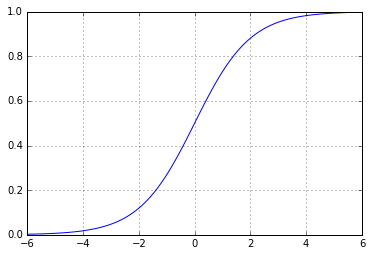

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.figure()
plt.axis([-6, 6, 0, 1])
plt.grid(True)
X = np.arange(-6,6,0.1)
y = 1 / (1 + np.e ** (-X))
plt.plot(X, y, 'b-');

In [10]:
import pandas as pd
df = pd.read_csv('E:\\PythonWorkSpace\\notebook\\dataset\\smsspamcollection\\SMSSpamCollection',delimiter='\t',header=None)
print(df.head())

      0                                                  1
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [11]:
print('Number of spam meassages:',df[df[0]=='spam'][0].count())

('Number of spam meassages:', 747)


In [64]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.cross_validation import train_test_split,cross_val_score

X_train_raw, X_test_raw, y_train, y_test = train_test_split(df[1],df[0])
vectorizer = TfidfVectorizer(stop_words='english')
# print(vectorizer.fit_transform(X_train_raw).todense().shape)
# print(vectorizer.vocabulary_)
X_train = vectorizer.fit_transform(X_train_raw)
X_test = vectorizer.transform(X_test_raw)
print(X_train.shape)
print(X_test.shape)

(4179, 7188)
(1393, 7188)


In [67]:
classifier = LogisticRegression()
classifier.fit(X_train,y_train)
predictions = classifier.predict(X_test)
for i ,prediction in enumerate(predictions[:5]):
    print 'Prediction: %s.Message: %s' % (prediction,X_test_raw.iloc[i])

Prediction: ham.Message: Hey... Very inconvenient for your sis a not huh?
Prediction: ham.Message: So ü'll be submitting da project tmr rite?
Prediction: ham.Message: Tell my  bad character which u Dnt lik in me. I'll try to change in  &lt;#&gt; . I ll add tat 2 my new year resolution. Waiting for ur reply.Be frank...good morning.
Prediction: spam.Message: FREE for 1st week! No1 Nokia tone 4 ur mobile every week just txt NOKIA to 8077 Get txting and tell ur mates. www.getzed.co.uk POBox 36504 W45WQ 16+ norm150p/tone
Prediction: ham.Message: What not under standing.


In [69]:
from sklearn.metrics import accuracy_score
y_pred,y_ture = [0, 1, 1, 0], [1, 1, 1, 1]
print 'Accuracy:',accuracy_score(y_ture,y_pred)
print'the number of correctly classified samples :',accuracy_score(y_ture,y_pred,normalize=False)

Accuracy: 0.5
the number of correctly classified samples : 2


In [83]:
scores = cross_val_score(classifier, X_train, y_train, cv=5)#这里的cv指的是cross validation，交叉验证了5次。
precisions = cross_val_score(classifier,X_train,y_train,cv=5,scoring='precision')
recall = cross_val_score(classifier,X_train,y_train,cv=5,scoring='recall')
print np.mean(scores),scores
# print "精准率：",np.mean(precisions),precisions
# print "召回率：" ,np.mean(recall),recall

#这样写会报错，找不到正确的label：ValueError: pos_label=1 is not a valid label: array(['ham', 'spam'], dtype='|S4')
#因为在计算中，有个参数需要时整数，比如 0和1，而不是str

ValueError: pos_label=1 is not a valid label: array(['ham', 'spam'], 
      dtype='|S4')

In [136]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.cross_validation import train_test_split,cross_val_score
df = pd.read_csv('E:\\PythonWorkSpace\\notebook\\dataset\\smsspamcollection\\SMSSpamCollection',delimiter='\t')
df.columns = ['label','message']
label = np.where(df['label']== 'spam',1,0) #将label中的'spam' 和 'ham' 转换为 1 和 0
df.label = label
# print df.head()
X_train_raw, X_test_raw, y_train, y_test = train_test_split(df['message'],df['label'])
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train_raw)
X_test = vectorizer.transform(X_test_raw)
classifier = LogisticRegression()
classifier.fit(X_train,y_train)
precisions = cross_val_score(classifier,X_train,y_train,cv=5,scoring = 'precision')
print('precisions:',np.mean(precisions),precisions)
recall = cross_val_score(classifier,X_train,y_train,cv = 6,scoring='recall')
print('recall',np.mean(recall),recall)

Automatically created module for IPython interactive environment
('precisions:', 0.99013089313007008, array([ 0.98734177,  1.        ,  0.97647059,  1.        ,  0.98684211]))
('recall', 0.68683748951422263, array([ 0.69148936,  0.67021277,  0.61702128,  0.76595745,  0.68817204,
        0.68817204]))


In [138]:
f1s = cross_val_score(classifier,X_train,y_train,cv=5,scoring='f1')
print("f1 score:",np.mean(f1s),f1s)
#这个函数还可以计算f0.5 和 f2 ，分别表示precision 的权重大于 recall 和 recall 的权重大于 precision 的。

('f1 score:', 0.79450764043500721, array([ 0.8125    ,  0.73033708,  0.84263959,  0.78918919,  0.79787234]))


0.989627707177


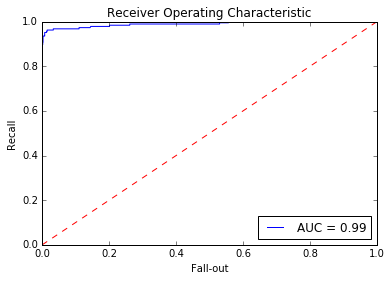

In [142]:
from sklearn.metrics import roc_curve ,auc
predictions = classifier.predict_proba(X_test)
false_positive_rate,recall,thresholds = roc_curve(y_test,predictions[:,1])

roc_auc = auc(false_positive_rate,recall)
print roc_auc
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, recall, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out')
plt.show()